In [1]:
import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy
import matplotlib.pyplot as plt
from math import floor
import time
import pickle

b2.defaultclock.dt = 0.10 * b2.ms

from brian2 import *

In [2]:
with open('rmp_mat_2ms_compare.pickle', 'rb') as f:
    nmda_2ms = pickle.load(f)

In [3]:
with open('rmp_mat_100ms_compare.pickle', 'rb') as f:
    nmda_100ms = pickle.load(f)

In [4]:
nmda_2ms

{'1p5': array([[-67.12423968, -67.13858254, -67.15285386, ..., -68.14766113,
         -68.15964633, -68.17916555],
        [-65.28580613, -65.30931818, -65.33271295, ..., -67.37776521,
         -67.33938268, -67.32450221],
        [-67.41789844, -67.43077667, -67.50232007, ..., -67.19757542,
         -67.22361292, -67.22087205],
        ...,
        [-65.26120198, -65.28483673, -65.30835361, ..., -68.3573011 ,
         -68.41307647, -68.43706968],
        [-66.21819802, -66.23705975, -66.25582742, ..., -68.13704054,
         -68.22843973, -68.27588454],
        [-68.37495213, -68.38305706, -68.36305115, ..., -68.23056303,
         -68.24753532, -68.2340392 ]]),
 '2p2': array([[-68.9711788 , -68.97631004, -68.95310238, ..., -68.66692689,
         -68.65969712, -68.66452735],
        [-67.94105543, -67.95132441, -67.93364853, ..., -67.34813809,
         -67.29467756, -67.27381024],
        [-68.00553077, -68.01547819, -67.99745607, ..., -68.75007477,
         -68.73172075, -68.74166803],

In [5]:
nmda_100ms

{'time': array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 1.1997e+00, 1.1998e+00,
        1.1999e+00]),
 '1p5': array([[-65.84552033, -65.8662408 , -65.80577225, ..., -65.30369506,
         -65.20121462, -65.12638697],
        [-68.39626824, -68.40426685, -68.32802374, ..., -66.17213163,
         -66.23061297, -66.36001779],
        [-66.13991202, -66.15916421, -66.1511605 , ..., -65.67834768,
         -65.67842106, -65.6325102 ],
        ...,
        [-68.9491788 , -68.95441977, -68.90303781, ..., -67.13908243,
         -67.18969946, -67.21537349],
        [-69.06604184, -69.07069995, -68.99031477, ..., -66.44492084,
         -66.42659077, -66.38838502],
        [-68.23359026, -68.24240023, -68.25116626, ..., -66.33326021,
         -66.26534252, -66.22000955]]),
 '2p2': array([[-68.0420447 , -68.05181   , -68.09923627, ..., -64.27227719,
         -64.31531096, -64.28889501],
        [-65.69591727, -65.71738388, -65.73874343, ..., -65.7305255 ,
         -65.76634677, -65.86902565],
    

In [6]:
rmp_mat_1p5_2ms = nmda_2ms['1p5']

In [7]:
rmp_mat_2p2_2ms = nmda_2ms['2p2']

In [8]:
time = nmda_2ms['time']

In [9]:
num_trial = 100

In [10]:
rmp_mean_1p5_2ms = numpy.mean(rmp_mat_1p5_2ms, axis=0)
rmp_sem_1p5_2ms = numpy.std(rmp_mat_1p5_2ms, axis=0)/numpy.sqrt(num_trial)

rmp_mean_2p2_2ms = numpy.mean(rmp_mat_2p2_2ms, axis=0)
rmp_sem_2p2_2ms = numpy.std(rmp_mat_2p2_2ms, axis=0)/numpy.sqrt(num_trial)


In [11]:
rmp_mat_1p5_100ms = nmda_100ms['1p5']
rmp_mat_2p2_100ms = nmda_100ms['2p2']



rmp_mean_1p5_100ms = numpy.mean(rmp_mat_1p5_100ms, axis=0)
rmp_sem_1p5_100ms = numpy.std(rmp_mat_1p5_100ms, axis=0)/numpy.sqrt(num_trial)


rmp_mean_2p2_100ms = numpy.mean(rmp_mat_2p2_100ms, axis=0)
rmp_sem_2p2_100ms = numpy.std(rmp_mat_2p2_100ms, axis=0)/numpy.sqrt(num_trial)


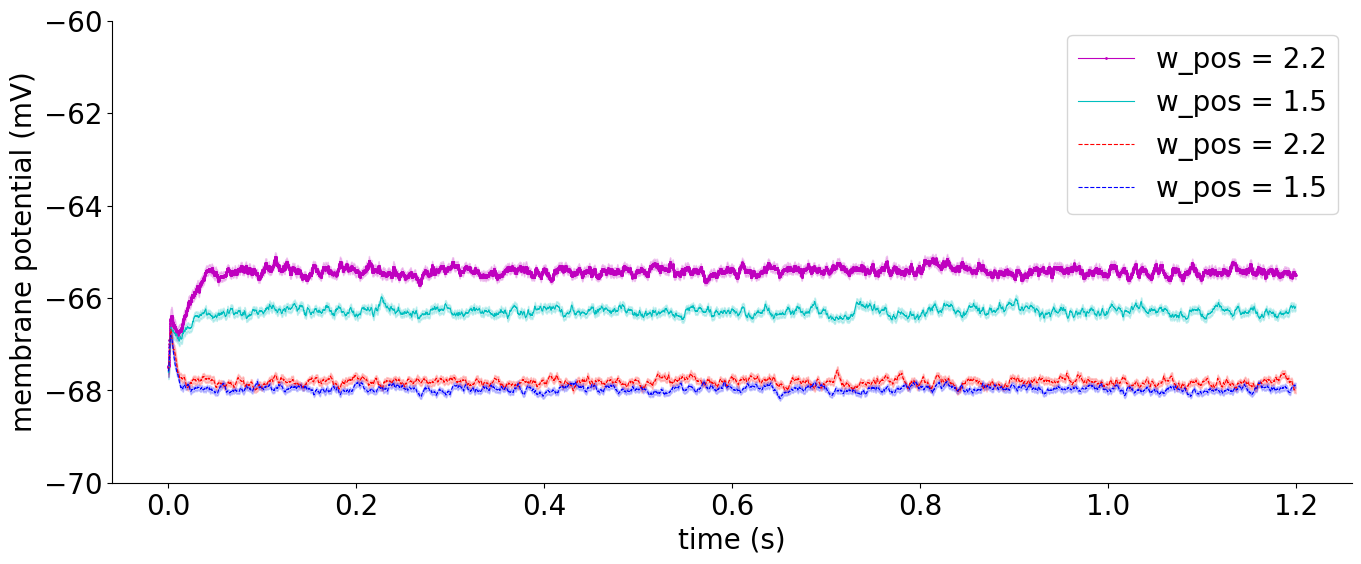

In [14]:
fig, ax = plt.subplots(1,figsize=(16, 6))


plt.rcParams.update({'font.size': 20})


#ax.plot(time, rmp_mean_2p2_100ms, 'm-', label='w_pos = 2.2', marker = 'o', markersize = 1, linewidth=0.8) 
#ax.fill_between(time, rmp_mean_2p2_100ms - rmp_sem_2p2_100ms, rmp_mean_2p2_100ms + rmp_sem_2p2_100ms, color='m', alpha=0.2)


ax.plot(time, rmp_mean_2p2_100ms, 'm-', label='w_pos = 2.2', marker = 'o', markersize = 1, linewidth=0.8) 
ax.fill_between(time, rmp_mean_2p2_100ms - rmp_sem_2p2_100ms, rmp_mean_2p2_100ms + rmp_sem_2p2_100ms, color='m', alpha=0.2)

ax.plot(time, rmp_mean_1p5_100ms, 'c-', label='w_pos = 1.5', linewidth=0.8) 
ax.fill_between(time, rmp_mean_1p5_100ms - rmp_sem_1p5_100ms, rmp_mean_1p5_100ms + rmp_sem_1p5_100ms, color='c', alpha=0.2)

ax.plot(time, rmp_mean_2p2_2ms, 'r--', label='w_pos = 2.2', linewidth=0.8) 
ax.fill_between(time, rmp_mean_2p2_2ms - rmp_sem_2p2_2ms, rmp_mean_2p2_2ms + rmp_sem_2p2_2ms, color='r', alpha=0.2)

ax.plot(time, rmp_mean_1p5_2ms, 'b--', label='w_pos = 1.5', linewidth=0.8) 
ax.fill_between(time, rmp_mean_1p5_2ms - rmp_sem_1p5_2ms, rmp_mean_1p5_2ms + rmp_sem_1p5_2ms, color='b', alpha=0.2)

ax.set_ylim([-70, -60])
ax.legend()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('time (s)')
ax.set_ylabel('membrane potential (mV)')
plt.savefig("figure6_four_cases2.svg", transparent=True)    



plt.show()